In [69]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision import transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

import os
import PIL
from torch.utils.data import Dataset, DataLoader
from PIL import Image


# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0
torchvision version: 0.18.0


In [70]:
#function to respect the image limits
def in_margins(x: int, margin: int) -> int:
    if x < 0:
        return 0
    if x > margin:
        return margin
    return x

In [60]:
#create a custom dataloader
class ImageLabelsDataset(Dataset):
    #initializer
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images_dir = os.path.join(root_dir, 'images')
        self.labels_dir = os.path.join(root_dir, 'labels')
        self.image_files = os.listdir(self.images_dir)

    #return the length of the dataset
    def __len__(self) -> int:
        return len(self.image_files)

    #get the pair image/labels of the indicated index 
    def __getitem__(self, idx: int):
        img_name = os.path.join(self.images_dir, self.image_files[idx])
        label_name = os.path.join(self.labels_dir, self.image_files[idx].replace('.jpg', '.txt'))
        
        image = Image.open(img_name)
        
        with open(label_name, 'r') as file:
            lines = file.readlines()
        
        labels = []
        for line in lines:
            parts = line.split()
            class_label = int(parts[0])
            # Convert normalized coordinates to absolute coordinates
            x_center = int(float(parts[1]) * image.width)
            y_center = int(float(parts[2]) * image.height)
            width = int(float(parts[3]) * image.width)
            height = int(float(parts[4]) * image.height)
            
            # Calculate bounding box coordinates
            #(x1, y1) is the upper left corner
            #(x2, y2) is the bottom right corner
            x1 = in_margins(x_center - width / 2, image.width)
            y1 = in_margins(y_center - height / 2, image.height)
            x2 = in_margins(x_center + width / 2, image.width)
            y2 = in_margins(y_center + height / 2, image.height)
            
            labels.append((class_label, (x1, y1, x2, y2)))
        
        if self.transform:
            image = self.transform(image)
        
        return image, labels

In [71]:
#Load the images from the given folder
path = "synthetic_dataset"
data = ImageLabelsDataset(path)

#split the dataset 70% train, 30% test
train_perc = 0.7
train_size = int(train_perc * len(data))
test_size = len(data) - train_size
train_data, test_data = torch.utils.data.random_split(data, [train_size, test_size])

In [79]:
data[0][0]

[(1, (110.5, 762.5, 167.5, 837.5)),
 (5, (223.0, 620.0, 283.0, 692.0)),
 (4, (492.0, 419.0, 596.0, 463.0)),
 (1, (531.0, 830.0, 635.0, 874.0)),
 (0, (283.5, 92.0, 392.5, 142.0)),
 (0, (744.0, 794.0, 786.0, 884.0)),
 (5, (969.0, 848.0, 1079.0, 896.0)),
 (1, (722.0, 952.0, 774.0, 1068.0)),
 (3, (719.5, 637.0, 828.5, 687.0)),
 (0, (698.0, 181.5, 802.0, 240.5)),
 (3, (617.0, 1065.0, 717.0, 1143.0)),
 (5, (392.0, 715.0, 492.0, 763.0)),
 (0, (853.0, 693.5, 967.0, 748.5)),
 (0, (195.0, 1025.0, 289.0, 1111.0)),
 (2, (183.0, 829.5, 289.0, 886.5)),
 (4, (596.0, 677.0, 664.0, 743.0)),
 (0, (1128.0, 446.5, 1184.0, 529.5)),
 (4, (338.0, 142.0, 394.0, 240.0)),
 (5, (700.0, 412.5, 800.0, 461.5)),
 (1, (693.0, 495.0, 775.0, 549.0)),
 (4, (246.0, 726.5, 350.0, 801.5)),
 (0, (1054.0, 1223.0, 1154.0, 1265.0)),
 (2, (993.0, 431.0, 1055.0, 503.0)),
 (3, (453.5, 718.0, 510.5, 830.0)),
 (0, (972.5, 795.0, 1085.5, 853.0)),
 (1, (385.0, 543.0, 455.0, 605.0)),
 (1, (540.0, 410.5, 656.0, 467.5)),
 (5, (1031.0, 1

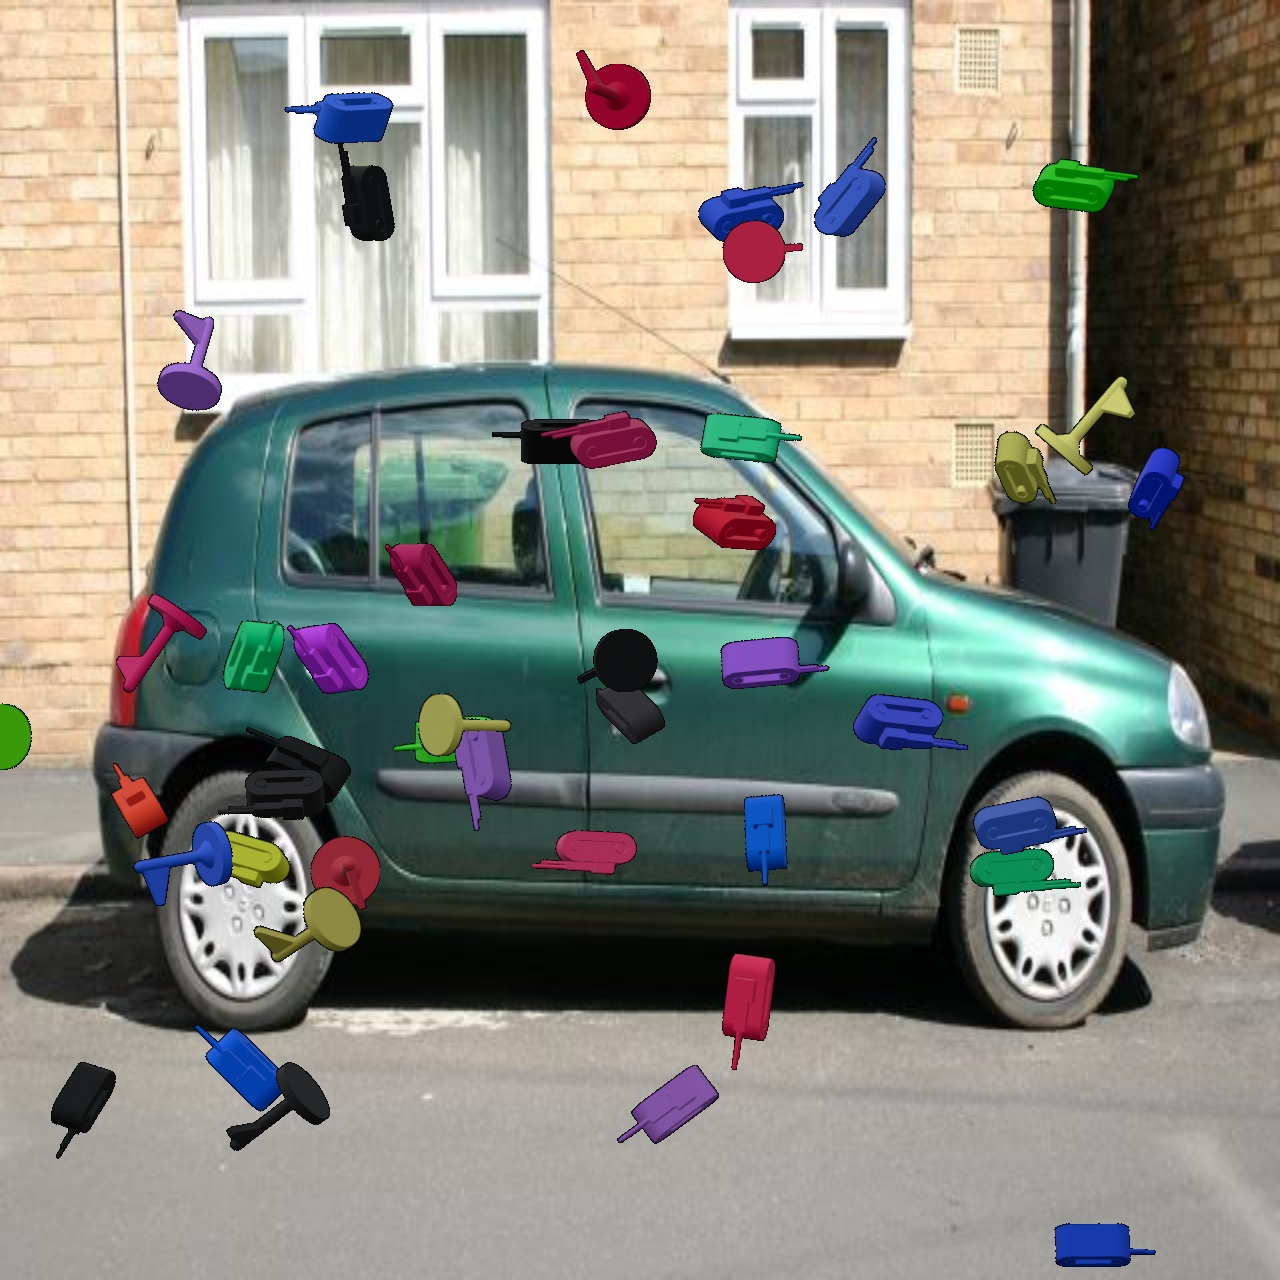

In [66]:
data[0][1]